In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import Equations as eq
import plot_conf as cplot

from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad

In [3]:
cplot.general()

#### Example

In [4]:
# Example 1
beta = 1.0
rmaxI = 100
a0, a1, g1 = 0.01, 1., -1.6
argB = [a0, a1, g1, rmaxI]  # a0, a1, g1, rbound
rspan, sol = eq.NDsolverEGBstars(beta, argB, Nptos=10000, rmin=1e-02, rmax=1e6,
             met='DOP853', Rtol=1e-6, Atol=1e-6)  # sol -> [N, g, phi, dN, dphi] 'DOP853' 'RK45'

In [5]:
# ISCO
metricprofs = [sol[1], sol[0], sol[3]]  # gprof, Nprof, dNprof
phiprofs = [sol[2], sol[4]]  # phiprof, dphiprof
values = [0.1, 0.1]  # l, gs
raiz, ddVeff =eq.ISCO(rspan, metricprofs, values, phiprofs=phiprofs, check=True)

Raíz encontrada: x = 1.578969 con Veff = 1.5799999999999983 0.422976413131273


/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


### Como funciona el escalamiento:

Supongamos que tenemos los perfiles de soluciones asociadas a distintos valores de $\beta_{(1)}$ con $\lambda_{(1)}=1 (c_1=1)$. Ahora deseamos obtener el perfil asociado a $\beta_2=5$ con $\lambda_{(2)}=5$. Lo que debemos hacer es encontrar la configuración cuya:

$$
\beta_{(1)} = \beta_{(2)}/\lambda_{(2)}^2
$$

Y luego escalarla como $r_{new}=r_{(1)}*\lambda_{(2)}, \phi_{new}=\lambda_{(2)}*\phi_{(1)}, \cdots$


In [5]:
# Example 2
beta_2 = 0.5
c1 = np.sqrt(beta_2)  # notar como se asegura que beta_{(1)} = 1
rmaxI_2 = 1000
a0_2, a1_2, g1_2 = 0.01, 1., g1*c1
argB_2 = [a0_2, a1_2, g1_2, rmaxI_2]  # a0, a1, g1, rbound
rspan_2, sol_2 = eq.NDsolverEGBstars(beta_2, argB_2, Nptos=10000, rmin=1e-02, rmax=1e6,
             met='DOP853', Rtol=1e-6, Atol=1e-6, c1=c1)  # sol -> [N, g, phi, dN, dphi] 'DOP853' 'RK45'

Solving the system in two intervals


(0.0, 30.0)

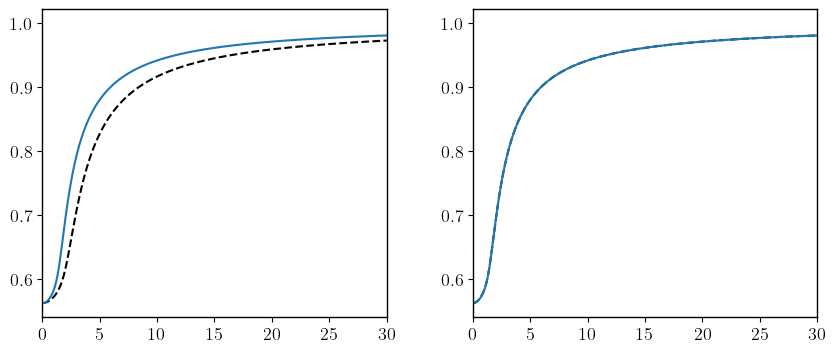

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.25))

ax[0].plot(rspan, sol[0], ls='--', c='k')  # beta=1.0
ax[0].plot(rspan_2, sol_2[0], ls='-')

ax[1].plot(rspan*c1, sol[0], ls='--', c='k')  # beta=1.0
ax[1].plot(rspan_2, sol_2[0], ls='-')

ax[0].set_xlim(0, 30)
ax[1].set_xlim(0, 30)

### Plots

In [7]:
# Example 1
beta = 1.0
rmaxI = 100
a0, a1, g1 = 0.01, 1., -1.6
argB = [a0, a1, g1, rmaxI]  # a0, a1, g1, rbound
rspan, sol = eq.NDsolverEGBstars(beta, argB, Nptos=30000, rmin=1e-02, rmax=1000,
             met='DOP853', Rtol=1e-6, Atol=1e-6)  # sol -> [N, g, phi, dN, dphi] 'DOP853' 'RK45'

Solving the system in two intervals


In [8]:
## Scalars tensors

RicciSac = eq.RicciScalar(rspan, sol)
Kr  = eq.Kretschmann(rspan, sol)

/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_70356/3693197774.py:8: RuntimeWarning: invalid value encountered in sqrt
  Sch = lambda r, M: np.sqrt(1 - 2*M/r)


Text(12.6, 1.2, '$a_1=1.0, \\;\\; M=20.1$')

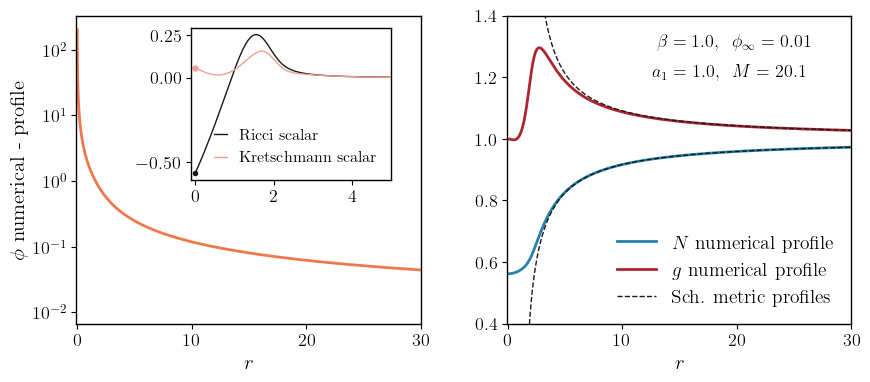

In [9]:
masaP = eq.masaADMProf(rspan, sol[1])
RicTeor = lambda beta: -9/(16*beta)
KrTeor = lambda beta: 15/(256*beta**2)

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

Sch = lambda r, M: np.sqrt(1 - 2*M/r)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.25))

ax[0].plot(rspan, sol[2], color=col[1], lw=2, label=r'$\phi$ profile ')

left, bottom, width, height = [0.24, 0.47, 0.2, 0.38]
ax0 = fig.add_axes([left, bottom, width, height])

ax0.plot(rspan[2:], RicciSac[2:], lw=1, color=col[0], label=r'Ricci scalar')
ax0.plot([0], [RicTeor(beta)], ls='', marker='o', markersize=3, color=col[0])

ax0.plot(rspan[2:], Kr[2:], lw=1, color=col[7], label=r'Kretschmann scalar')
ax0.plot([0], [KrTeor(beta)], ls='', marker='o', markersize=3.5, color=col[7])

ax0.set_yticks([-0.5, 0, 0.25])
ax0.set_xlim(-0.1, 5)
ax0.legend(frameon=False, fontsize=11.5, handlelength=0.8)

#####

ax[1].plot(rspan, sol[0], color=col[2], lw=2, label=r'$N$ numerical profile')  
ax[1].plot(rspan, sol[1], color=col[3], lw=2, label=r'$g$ numerical profile')

indmin = -90000
ax[1].plot(rspan[indmin:], Sch(rspan[indmin:], masaP[-1]), color=col[0], lw=1, ls='--', label=r'Sch. metric profiles')
ax[1].plot(rspan[indmin:], 1/Sch(rspan[indmin:], masaP[-1]), color=col[0], lw=1, ls='--')


for axes in ax:
    axes.set_xlabel(r'$r$')
    axes.set_xlim(-0.05, 30)

ax[0].set_ylabel(r'$\phi$ numerical - profile')

ax[1].set_ylim(.4, 1.4)
ax[0].set_yscale('log')

ax[1].legend(frameon=False, fontsize=14)

ax[1].text(x=13, y=1.3, s=r"$\beta=%2.1f, \;\; \phi_{\infty}=%3.2f$"%(beta, a0), fontsize=13)
ax[1].text(x=12.6, y=1.2, s=r"$a_1=%2.1f, \;\; M=%2.1f$"%(a1, -4*np.pi*g1), fontsize=13)


In [17]:
fig.savefig('Illustrative_Example.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

(0.0, 20.0)

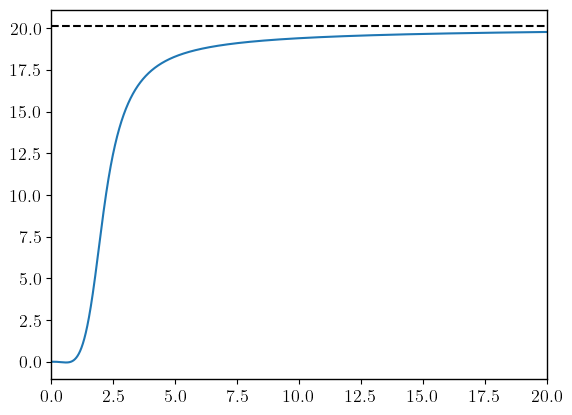

In [10]:
# Check mass

masaP = eq.masaADMProf(rspan, sol[1])
plt.plot(rspan, 8*np.pi*masaP, label='n')
plt.hlines(y=-4*np.pi*g1, xmin=0, xmax=20, color='k', ls='--', label='M')
plt.xlim(0, 20)

In [11]:
# Serie Origen
c1 = 1
arg = [sol[0][0], beta, c1]

fN0, fg0, fphi = eq.serOrig(rspan, sol[2], arg, rminFit=.1, rmaxFit=5.0, namefit="fphi", info=True)

Fitting fphi with parameters: [-0.27343253  2.01390323]
Error: [0.00072763 0.00073903]


In [12]:
# Serie asintótica
arg = [a0, a1, g1, beta, c1]

rmaxV = np.linspace(rmaxI, 3*rmaxI, 1000)  #rspan
nRmax, dnRmax, gMax, pMax, dpMax = eq.BoundaConditionInf(rmaxV, arg)

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

(0.98, 1.31)

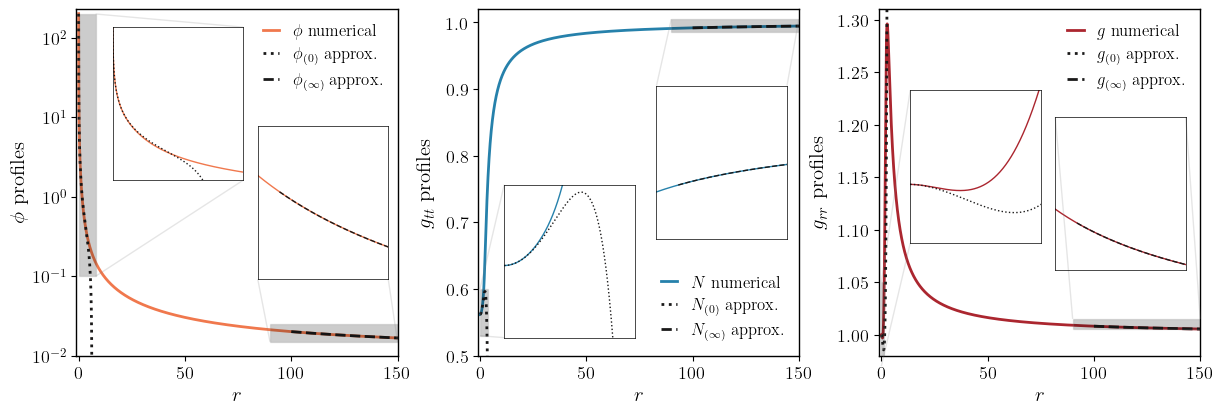

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14.5, 4.5), #(15, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.25))

#############################################
ax[0].plot(rspan, sol[2], color=col[1], lw=2, label=r'$\phi$ numerical')
ax[0].plot(rspan[:4980], fphi[:4980], color=col[0], lw=2, ls=':', label=r'$\phi_{(0)}$ approx.')
ax[0].plot(rmaxV, pMax, color=col[0], lw=2, ls='--', label=r'$\phi_{(\infty)}$ approx.')

###
left, bottom, width, height = [0.15, 0.5, 0.09, 0.34]
ax01 = fig.add_axes([left, bottom, width, height])

ax01.plot(rspan, sol[2], color=col[1], lw=1)
ax01.plot(rspan[:2980], fphi[:2980], color=col[0], lw=1, ls=':')
mark_inset(ax[0], ax01, loc1=1, loc2=4, color=col[0], fc="k", alpha=0.2, ec=".5", ls='-', lw=1, zorder=2)

ax01.set_xlim(rspan[0], 8)
ax01.set_ylim(1e-01, 2.*1e02)

###
left, bottom, width, height = [0.25, 0.28, 0.09, 0.34]
ax02 = fig.add_axes([left, bottom, width, height])
ax02.plot(rspan, sol[2], color=col[1], lw=1)
ax02.plot(rmaxV, pMax, color=col[0], lw=1, ls='--')
mark_inset(ax[0], ax02, loc1=3, loc2=4, color=col[0], fc="k", alpha=0.2, ec=".5", ls='-', lw=1, zorder=2)

ax02.set_xlim(90, 150)
ax02.set_ylim(1.5*1e-02, 2.5*1e-02)

###
temp = [ax01, ax02]
for axes in temp:
    axes.set_yscale('log')
    axes.set_xticks([])
    axes.set_yticks([])
    axes.spines['top'].set_linewidth(0.5)
    axes.spines['bottom'].set_linewidth(0.5)
    axes.spines['right'].set_linewidth(0.5)
    axes.spines['left'].set_linewidth(0.5)

    
ax[0].set_ylabel(r'$\phi$ profiles')
#############################################

ax[1].plot(rspan, sol[0], color=col[2], lw=2, label=r'$N$ numerical')
ax[1].plot(rspan[:4980], fN0[:4980], color=col[0], lw=2, ls=':', label=r'$N_{(0)}$ approx.')
ax[1].plot(rmaxV, nRmax, color=col[0], lw=2, ls='--', label=r'$N_{(\infty)}$ approx.')

###
left, bottom, width, height = [0.42, 0.15, 0.09, 0.34]
ax11 = fig.add_axes([left, bottom, width, height])

ax11.plot(rspan, sol[0], color=col[2], lw=1)
ax11.plot(rspan[:2980], fN0[:2980], color=col[0], lw=1, ls=':')
mark_inset(ax[1], ax11, loc1=3, loc2=2, color=col[0], fc="k", alpha=0.2, ec=".5", ls='-', lw=1, zorder=2)

ax11.set_xlim(rspan[0], 4)
ax11.set_ylim(0.53, 0.6)


###
left, bottom, width, height = [0.525, 0.37, 0.09, 0.34]
ax12 = fig.add_axes([left, bottom, width, height])

ax12.plot(rspan, sol[0], color=col[2], lw=1)
ax12.plot(rmaxV, nRmax, color=col[0], lw=1, ls='--')
mark_inset(ax[1], ax12, loc1=1, loc2=2, color=col[0], fc="k", alpha=0.2, ec=".5", ls='-', lw=1, zorder=2)

ax12.set_xlim(90, 150)
ax12.set_ylim(0.985, 1.005)

###
temp = [ax11, ax12]
for axes in temp:
    axes.set_yscale('log')
    axes.set_xticks([])
    axes.set_yticks([])
    axes.spines['top'].set_linewidth(0.5)
    axes.spines['bottom'].set_linewidth(0.5)
    axes.spines['right'].set_linewidth(0.5)
    axes.spines['left'].set_linewidth(0.5)

ax[1].set_ylabel(r'$g_{tt}$ profiles', labelpad=8)
#############################################
ax[2].plot(rspan, sol[1], color=col[3], lw=2, label=r'$g$ numerical')
ax[2].plot(rspan[:1000], fg0[:1000], color=col[0], lw=2, ls=':', label=r'$g_{(0)}$ approx.')
ax[2].plot(rmaxV, gMax, color=col[0], lw=2, ls='--', label=r'$g_{(\infty)}$ approx.')

###
left, bottom, width, height = [0.7, 0.36, 0.09, 0.34]
ax21 = fig.add_axes([left, bottom, width, height])

ax21.plot(rspan, sol[1], color=col[3], lw=1)
ax21.plot(rspan[:1000], fg0[:1000], color=col[0], lw=1, ls=':')
mark_inset(ax[2], ax21, loc1=3, loc2=2, color=col[0], fc="k", alpha=0.2, ec=".5", ls='-', lw=1, zorder=2)

ax21.set_xlim(rspan[0], 1.4)
ax21.set_ylim(0.97, 1.05)

###
left, bottom, width, height = [0.8, 0.3, 0.09, 0.34]
ax22 = fig.add_axes([left, bottom, width, height])

ax22.plot(rspan, sol[1], color=col[3], lw=1)
ax22.plot(rmaxV, gMax, color=col[0], lw=1, ls='--')
mark_inset(ax[2], ax22, loc1=1, loc2=2, color=col[0], fc="k", alpha=0.2, ec=".5", ls='-', lw=1, zorder=2)

ax22.set_xlim(90, 150)
ax22.set_ylim(1.005, 1.015)

###
temp = [ax21, ax22]
for axes in temp:
    axes.set_yscale('log')
    axes.set_xticks([])
    axes.set_yticks([])
    axes.spines['top'].set_linewidth(0.5)
    axes.spines['bottom'].set_linewidth(0.5)
    axes.spines['right'].set_linewidth(0.5)
    axes.spines['left'].set_linewidth(0.5)


ax[2].set_ylabel(r'$g_{rr}$ profiles', labelpad=8)
#############################################
for axes in ax:
    axes.set_xlabel(r'$r$')
    axes.set_xlim(-1, 150)
    axes.legend(frameon=False, fontsize=12, handlelength=1)
    
ax[0].set_yscale('log')
ax[0].set_ylim(1e-02, 2.3*1e02)
ax[1].set_ylim(.5, 1.02)
ax[2].set_ylim(.98, 1.31)



In [ ]:
fig.savefig('Illustrative_PowerExp.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

(0.0, 20.0)

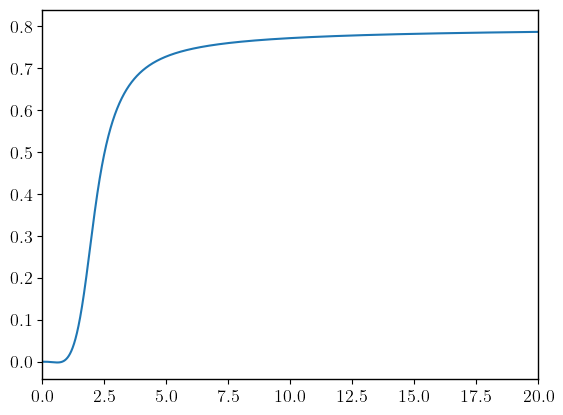

In [15]:
masaP = eq.masaADMProf(rspan, sol[1])
plt.plot(rspan, masaP, label='n')
plt.xlim(0, 20)

### Fermionic matter

In [4]:
def EDO(p, arg):
    k, Gamma = arg
    if Gamma == 1:
        raise ValueError("Gamma must not be 1 to avoid division by zero.")
    epsilon = (p/k)**(1/Gamma) + p/(Gamma - 1)
    return epsilon

In [5]:
def EDOcte(p, arg):
    c = arg
    epsilon = c
    return epsilon

#### Integrating from origin

In [94]:
### de 0 -> Rmax
edo = lambda p: EDO(p, [100, 2])
edoc = lambda p: EDOcte(p, 0.04)
beta = 1.

zeroP_val = 1e-25
#n0, g0, p0, dn0, dp0, pres0 = 0.06531039971184449, 1, .5, 0, 0, 0.2
n0, g0, p0, dn0, dp0, pres0 = 0.18731030740790117, 1, .5, 0, 0, 0.02
V0 = [n0, g0, p0, dn0, dp0, pres0]
#rspan, sol = eq.main_NDsolverEGBHstars(beta, edoc, V0=V0, argB=None, c1=1, Nptos=100000, rmin=1e-4, rmax=1e2,
#             met='LSODA', Rtol=1e-6, Atol=1e-6, zeroP_val=zeroP_val)  # LSODA
rspan, sol, R_star = eq.main_NDsolverEGBHstars(beta, edo, V0=V0, argB=None, c1=1, Nptos=100000, rmin=1e-6, rmax=1e5,
             met='LSODA', Rtol=1e-6, Atol=1e-6, zeroP_val=zeroP_val)  # LSODA

Solving from interior
Radio =====>   25.704854844249386


In [95]:
print(np.gradient(np.gradient(sol[1],rspan),rspan)[0] - 8*sol[2][0]*np.gradient(np.gradient(sol[1],rspan),rspan)[0]*np.gradient(sol[4],rspan)[0] - edo(pres0))
print(np.gradient(np.gradient(sol[1],rspan),rspan)[0]-2*np.gradient(sol[3],rspan)[0]/sol[0][0]+16*sol[2][0]*np.gradient(sol[4],rspan)[0]*(np.gradient(sol[3],rspan)[0]/sol[0][0])+pres0)
print(np.gradient(sol[4],rspan)[0] - 8*sol[2][0]*np.gradient(np.gradient(sol[1],rspan),rspan)[0]*np.gradient(sol[3],rspan)[0]/sol[0][0])


-0.028518943510672336
-0.00583432786966594
0.0003516847375501361


In [96]:
np.gradient(sol[3],rspan)[0], (edo(pres0)+2*pres0)*sol[0][0]/2, -sol[0][0]*np.gradient(np.gradient(sol[5],rspan),rspan)[0]/(edo(pres0)+pres0)

(0.0029560212642371388, 0.0069437931077796725, 0.0013537979712587478)

(0.0, 500.0)

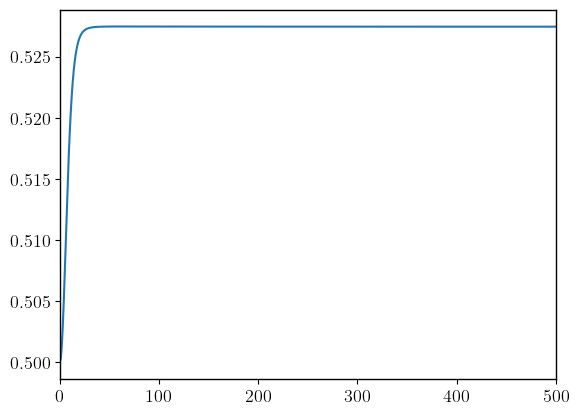

In [97]:
#plt.plot(rspan, np.gradient(sol[3],rspan))
plt.plot(rspan, sol[2])
#plt.plot(rspan, np.gradient(np.gradient(sol[1],rspan),rspan),ls='--')

plt.xlim(0, 500)

In [65]:
# check
1/sol[0, -1]

0.9998375362249953

In [66]:
## Scalars tensors
RicciSac = eq.RicciScalar(rspan, sol[:-1])
Kr  = eq.Kretschmann(rspan, sol[:-1])

[]

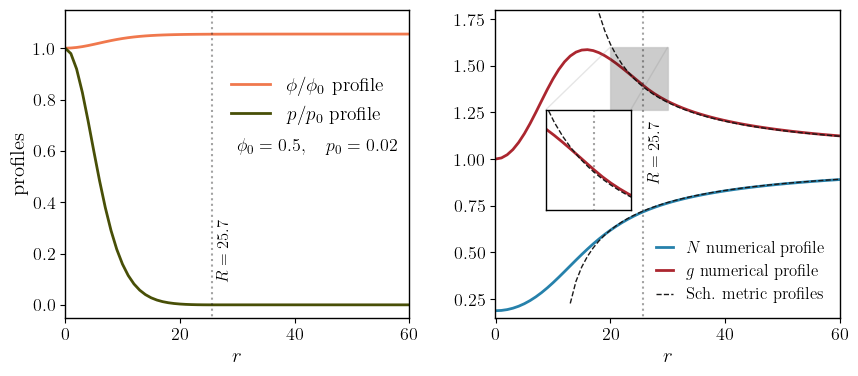

In [127]:
rS = 25.66521797018026
masaP = eq.masaADMProf(rspan, sol[1])

RicTeor = lambda beta: -9/(16*beta)
KrTeor = lambda beta: 15/(256*beta**2)

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

Sch = lambda r, M: np.sqrt(1 - 2*M/r)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.25))

ax[0].plot(rspan, sol[2]/sol[2][0], color=col[1], lw=2, label=r'$\phi/\phi_0$ profile ')
ax[0].plot(rspan, sol[-1]/sol[-1][0], color=col[8], lw=2, label=r'$p/p_0$ profile ')

ax[0].set_ylabel(r'profiles')
ax[0].vlines(x=rS, ymin=-0.5, ymax=1.5, ls=':', color=col[0], alpha=0.4)

ax[0].text(x=30, y=0.6, s=r'$\phi_0 = %2.1f, \quad p_0 = %3.2f$'%(p0, pres0), fontsize=13, rotation=0)
ax[0].set_ylim(-0.05, 1.15)

ax[0].text(x=rS + .8, y=0.1, s=r'$R = %2.1f$'%rS, fontsize=12, rotation=90)
ax[0].legend(loc=(0.46, 0.6), frameon=False, fontsize=14)
#####

ax[1].plot(rspan, sol[0], color=col[2], lw=2, label=r'$N$ numerical profile')  
ax[1].plot(rspan, sol[1], color=col[3], lw=2, label=r'$g$ numerical profile')

indmin = 13
ax[1].plot(rspan[indmin:], Sch(rspan[indmin:], masaP[-1]), color=col[0], lw=1, ls='--', label=r'Sch. metric profiles')
ax[1].plot(rspan[indmin:], 1/Sch(rspan[indmin:], masaP[-1]), color=col[0], lw=1, ls='--')

for axes in ax:
    axes.set_xlabel(r'$r$')
    axes.set_xlim(-0.05, 60)
ax[1].set_ylim(0.15, 1.8)

ax[1].vlines(x=rS, ymin=-0.5, ymax=3.5, ls=':', color=col[0], alpha=0.4)
ax[1].text(x=rS + .8, y=0.88, s=r'$R = %2.1f$'%rS, fontsize=12, rotation=90)

ax[1].legend(loc='best', frameon=False, fontsize=12, handlelength=1)

left, bottom, width, height = [0.606, 0.38, 0.085, 0.25]
ax1 = fig.add_axes([left, bottom, width, height])

ax1.plot(rspan, sol[1], color=col[3], lw=2, label=r'$g$ numerical profile')
ax1.plot(rspan[indmin:], 1/Sch(rspan[indmin:], masaP[-1]), color=col[0], lw=1, ls='--')
ax1.vlines(x=rS, ymin=-0.5, ymax=5, ls=':', color=col[0], alpha=0.4)

ax1.set_ylim(1.26, 1.6)
ax1.set_xlim(20, 30)
mark_inset(ax[1], ax1, loc1=2, loc2=1, color=col[0], fc="k", alpha=0.2, ec=".5", ls='-', lw=1, zorder=2)
ax1.set_xticks([])
ax1.set_yticks([])


In [128]:
fig.savefig('Illustrative_MatterExp1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

(0.0, 200.0)

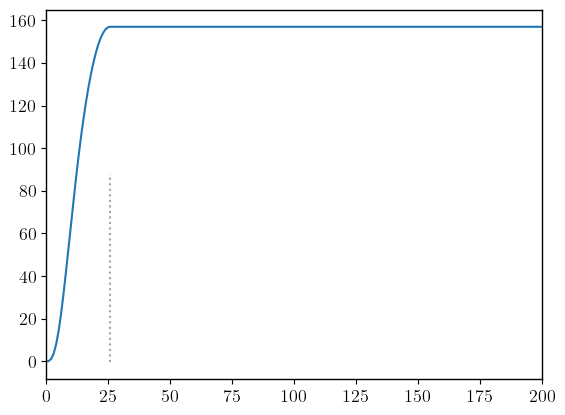

In [130]:
masaP = eq.masaADMProf(rspan, sol[1])
plt.plot(rspan, 8*np.pi*masaP, label='n')
plt.vlines(x=rS, ymin=-0.5, ymax=8*np.pi*3.5, ls=':', color=col[0], alpha=0.4)
plt.xlim(0, 200)

In [131]:
8*np.pi*masaP[-1]

155.00250072492554

#### Sin materia

In [132]:
# Sin materia
beta = 1.0
rmaxI = 100
a0, a1, g1 = 0.01, 1., -1.6
argB = [a0, a1, g1, rmaxI]  # a0, a1, g1, rbound
rspanV, solV = eq.NDsolverEGBstars(beta, argB, Nptos=10000, rmin=1e-01, rmax=1000,
             met='DOP853', Rtol=1e-6, Atol=1e-6)  # sol -> [N, g, phi, dN, dphi] 'DOP853' 'RK45'

Solving the system in two intervals


In [133]:
# Sin materia tomando p(R)=0
edo = lambda p: EDO(p, [100, 2])
edoc = lambda p: EDOcte(p, 0.04)

R_star = 25
pR = 0
a0, a1, g1 = 0.01, 1., -1.6
argB = [a0, a1, g1, rmaxI, R_star, pR]  # a0, a1, g1, rbound
rspan, sol = eq.main_NDsolverEGBHstars(beta, edo, V0=None, argB=argB, c1=1, Nptos=1000, rmin=1e-4, rmax=1e2,
             met='RK45', Rtol=1e-6, Atol=1e-6)

Solving from exterior
Solving inward only
We are integrating from R to the origin
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.0
=>  0.

In [35]:
# plt.plot(rspanV, solV[0])
# plt.plot(rspan, sol[0])
# plt.xlim(0,20)

### Con materia escalar divergente

In [134]:
masaP = [155.00250072492554] # [0.62]

In [185]:
# Con materia
edo = lambda p: EDO(p, [100, 2])
edoc = lambda p: EDOcte(p, 0.04)

# R_star = 25
R_star = 1 * rS
pR = zeroP_val # 1e-08
rmaxI = 400
a0, a1, g1 = 0.01, 1., masaP[-1]/(-4*np.pi) # -2 * 3.4243531266938243 #1.6
argB = [a0, a1, g1, rmaxI, R_star, pR]  # a0, a1, g1, rbound
rspan_2, sol_2 = eq.main_NDsolverEGBHstars(beta, edo, V0=None, argB=argB, c1=1, Nptos=10000, rmin=1e-4, rmax=1e3,
             met='RK45', Rtol=1e-6, Atol=1e-6)

Solving from exterior
Solving the system in two intervals
We are integrating from R to the origin
=>  -7.01117207747155e-11


In [186]:
RicciSac_2 = eq.RicciScalar(rspan_2, sol_2[:-1])
Kr_2  = eq.Kretschmann(rspan_2, sol_2[:-1])

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_70356/814881950.py:8: RuntimeWarning: invalid value encountered in sqrt
  Sch = lambda r, M: np.sqrt(1 - 2*M/r)


Text(26.66521797018026, -0.02, '$R = 25.7$')

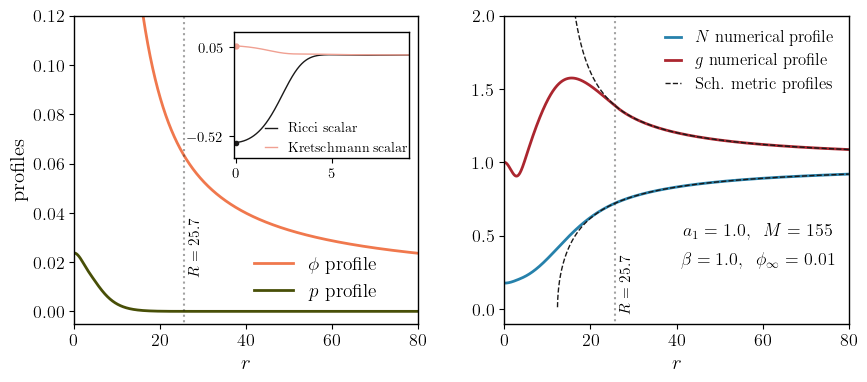

In [295]:
masaP_2 = eq.masaADMProf(rspan_2, sol_2[1])
RicTeor = lambda beta: -9/(16*beta)
KrTeor = lambda beta: 15/(256*beta**2)

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

Sch = lambda r, M: np.sqrt(1 - 2*M/r)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.25))

ax[0].plot(rspan_2, sol_2[2], color=col[1], lw=2, label=r'$\phi$ profile ')
ax[0].plot(rspan_2, sol_2[-1], color=col[8], lw=2, label=r'$p$ profile ')

left, bottom, width, height = [0.285, 0.525, 0.175, 0.315]
ax0 = fig.add_axes([left, bottom, width, height])

ax0.plot(rspan_2[2:], RicciSac_2[2:], lw=1, color=col[0], label=r'Ricci scalar')
ax0.plot([0], [RicTeor(beta)], ls='', marker='o', markersize=3, color=col[0])

ax0.plot(rspan_2[2:], Kr_2[2:], lw=1, color=col[7], label=r'Kretschmann scalar')
ax0.plot([0], [KrTeor(beta)], ls='', marker='o', markersize=3.5, color=col[7])

#ax0.vlines(x=rS, ymin=-5, ymax=12., ls=':', color=col[0], alpha=0.4)
ax0.set_yticks([-0.52, 0.05])
ax0.xaxis.set_tick_params(labelsize=10.5)
ax0.yaxis.set_tick_params(labelsize=10.5)
ax0.set_xlim(-0.1, 9)
ax0.set_ylim(-0.66, 0.15)
ax0.legend(loc=(0.15, -0.02), frameon=False, fontsize=10., handlelength=0.8)

ax[0].vlines(x=rS, ymin=-0.5, ymax=3.5, ls=':', color=col[0], alpha=0.4)
ax[0].text(x=rS + 1., y=0.015, s=r'$R = %2.1f$'%rS, fontsize=11, rotation=90)

#ax[0].set_yscale('log')
ax[0].set_ylim(-0.005, .12)
ax[0].set_ylabel(r'profiles')
ax[0].legend(loc=(0.5, 0.05), frameon=False, fontsize=14)

#####

ax[1].plot(rspan_2, sol_2[0], color=col[2], lw=2, label=r'$N$ numerical profile')  
ax[1].plot(rspan_2, sol_2[1], color=col[3], lw=2, label=r'$g$ numerical profile')

ax[1].plot(rspan_2[indmin:], Sch(rspan_2[indmin:], masaP_2[-1]), color=col[0], lw=1, ls='--', label=r'Sch. metric profiles')
ax[1].plot(rspan_2[indmin:], 1/Sch(rspan_2[indmin:], masaP_2[-1]), color=col[0], lw=1, ls='--')


for axes in ax:
    axes.set_xlabel(r'$r$')
    axes.set_xlim(-0.05, 80)
ax[1].set_ylim(-0.1, 2.0)

ax[1].legend(frameon=False, fontsize=12, handlelength=1)

ax[1].text(x=41, y=0.3, s=r"$\beta=%2.1f, \;\; \phi_{\infty}=%3.2f$"%(beta, a0), fontsize=13)
ax[1].text(x=41.6, y=0.5, s=r"$a_1=%2.1f, \;\; M=%2.0f$"%(a1, -4*np.pi*g1), fontsize=13)

ax[1].vlines(x=rS, ymin=-0.5, ymax=4.5, ls=':', color=col[0], alpha=0.4)
ax[1].text(x=rS + 1., y=-0.02, s=r'$R = %2.1f$'%rS, fontsize=11, rotation=90)


In [300]:
sol_2[-1][0]

0.02370019543867231

In [296]:
fig.savefig('Illustrative_MatterExp2.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

(0.0, 200.0)

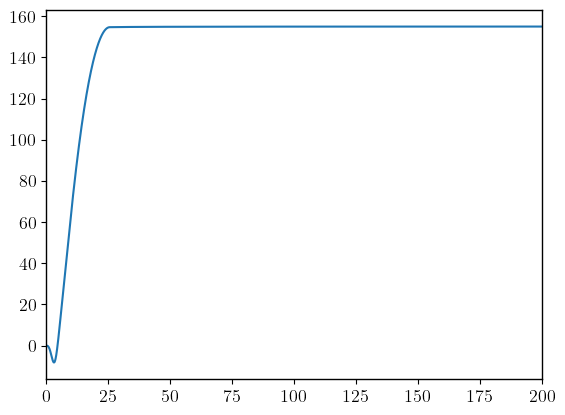

In [299]:
masaP_2 = 8*np.pi*eq.masaADMProf(rspan_2, sol_2[1])
plt.plot(rspan_2, masaP_2, label='n')
plt.xlim(0, 200)

(0.0, 20.0)

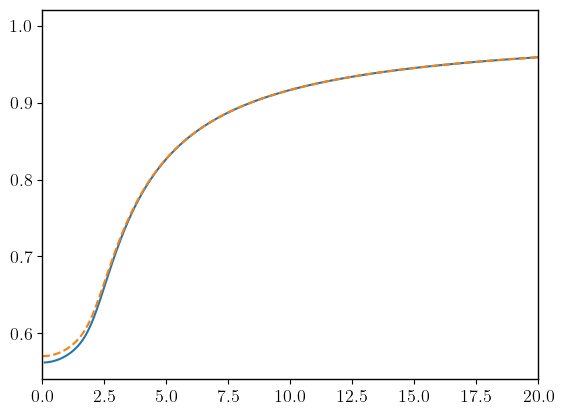

In [24]:
# comparacion sin materia
plt.plot(rspanV, solV[0])
plt.plot(rspan_2, sol_2[0], ls='--')
plt.xlim(0,20)

(0.0, 20.0)

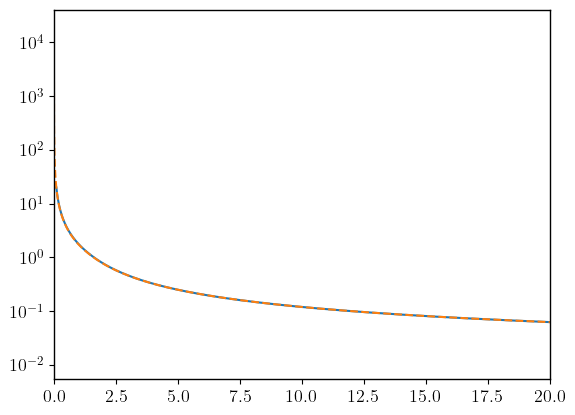

In [25]:
plt.plot(rspanV, solV[2])
plt.plot(rspan_2, sol_2[2], ls='--')
plt.yscale('log')
plt.xlim(0, 20)

(0.0, 20.0)

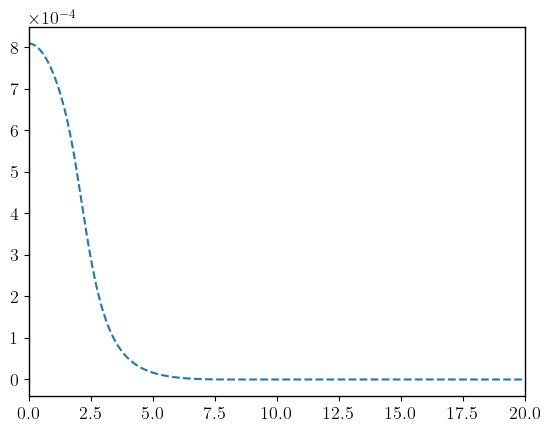

In [26]:
# plt.plot(rspanV, solV[-1])
plt.plot(rspan_2, sol_2[-1], ls='--')
plt.xlim(0,20)
#plt.xlim(20, 30)

In [115]:
pres0, sol_2[-1][0]

(0.2, 0.0008094066683130422)

In [130]:
sol_2[-1][0]

0.00017266057515401715

(0.0, 60.0)

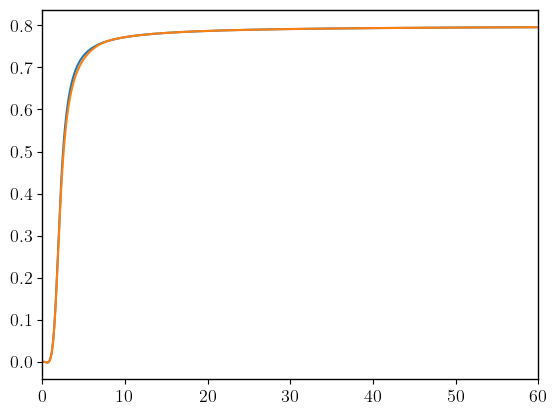

In [27]:
masaP = eq.masaADMProf(rspan, sol[1])
masaP_2 = eq.masaADMProf(rspan_2, sol_2[1])
plt.plot(rspan, masaP, label='n')
plt.plot(rspan_2, masaP_2, label='n')
plt.xlim(0, 60)

In [34]:
# ISCO
# Test Schw.
M = 1
Sch = lambda r, M: np.sqrt(1 - 2*M/r)
rspan = np.linspace(2*M+.1, 70, 5000)

dNprof = np.gradient(Sch(rspan, M), rspan)
metricprofs = [1/Sch(rspan, M), Sch(rspan, M), dNprof]  # gprof, Nprof, dNprof

#plt.plot(rspan, metricprofs[0], label='gtt')
#plt.plot(rspan, metricprofs[1], label='grr')
#plt.vlines(x=2*M, ymin=-0.5, ymax=2.5, ls=':', color='k', alpha=0.4)
#plt.xlim(0, 20)
#plt.ylim(0, 2)
#plt.show()

valores = []
lval = np.logspace(np.log10(3.4642), np.log10(8), 30) # [4, 5, 6, 7]  # np.arange(3.4641, 20, 1)
for l in lval:
    values = [l, 0]  # l, gs
    raiz, ddVeff = eq.ISCO(rspan, metricprofs, values, phiprofs=None, check=False, zeroAsum=1e-4)
    valores.append((raiz, ddVeff))

raizvalores = np.array([[i, lval[ind]] for ind, v in enumerate(valores) for i in v[0]], dtype=float)
raizddVeff = np.array([[i, lval[ind]] for ind, v in enumerate(valores) for i in v[1]], dtype=float)

(0.0, 10.0)

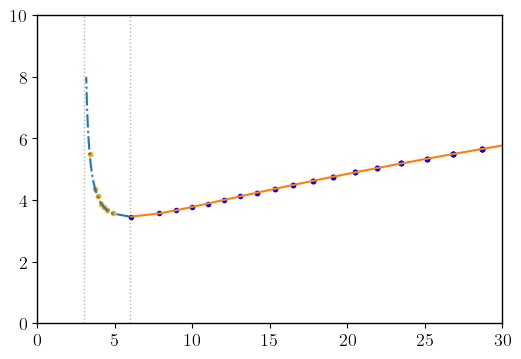

In [ ]:
scRL = lambda l, M=1: (l**2 - np.sqrt(l**4 - 12 * l**2 * M**2))/(2*M)
scRL2 = lambda l, M=1: (l**2 + np.sqrt(l**4 - 12 * l**2 * M**2))/(2*M)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.25))

for i in range(len(raizvalores[:, 0])):
    ax.plot(raizvalores[i, 0], raizvalores[i, 1], ls='', color='b' if raizddVeff[i, 0]>0 else 'orange',
        marker='o', markersize=3, label='Raiz')
ax.plot(scRL(lval, M), lval, ls='-.', label='Raiz')
ax.plot(scRL2(lval, M), lval, ls='-', label='Raiz')
ax.vlines(3, ymin=0, ymax=10, ls=':', lw=1, color='k', alpha=0.3)
ax.vlines(6, ymin=0, ymax=10, ls=':', lw=1, color='k', alpha=0.3)
ax.set_xlim(0, 30)
ax.set_ylim(0, 10)

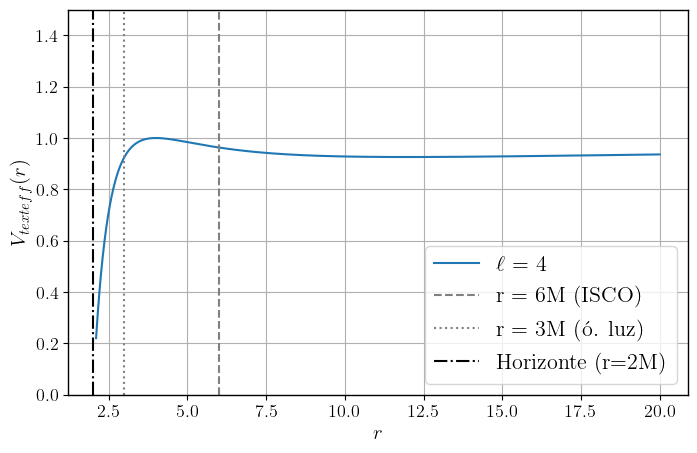

In [59]:

# Constantes (en unidades naturales G = c = 1)
M = 1       # masa central (por ejemplo, agujero negro)
l = 4       # momento angular por unidad de masa

# Dominio de r (evita r = 2M porque g_tt se anula allí)
r = np.linspace(2.1 * M, 20 * M, 1000)

# Potencial efectivo
V_eff = (1 - 2*M / r) * (1 + l**2 / r**2)

# Gráfica
plt.figure(figsize=(8,5))
plt.plot(r, V_eff, label=f'$\\ell$ = {l}')
plt.axvline(x=6*M, color='gray', linestyle='--', label='r = 6M (ISCO)')
plt.axvline(x=3*M, color='gray', linestyle=':', label='r = 3M (ó. luz)')
plt.axvline(x=2*M, color='k', linestyle='-.', label='Horizonte (r=2M)')
#plt.title('Potencial efectivo en Schwarzschild')
plt.xlabel(r'$r$')
plt.ylabel(r'$V_{\\text{eff}}(r)$')
plt.ylim(0, 1.5)
plt.grid(True)
plt.legend()
plt.show()